In [1]:
%matplotlib inline

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.io import imread, imshow
from skimage.transform import resize

import tensorflow as tf

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, LSTM, Dense, Flatten

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import resnet_v2

# Neural Network Architectures
## Live Demos

In [41]:
VOCABULARY_SIZE = 10000
MAX_NUM_WORDS = 300

EMBEDDING_DIMENSION = 32
BATCH_SIZE = 32

In [6]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = VOCABULARY_SIZE)

In [8]:
x_train.shape

(25000,)

In [25]:
x_train = pad_sequences(x_train, maxlen = MAX_NUM_WORDS, padding = "post", truncating = "post")
x_test = pad_sequences(x_test, maxlen = MAX_NUM_WORDS, padding = "post", truncating = "post")

In [30]:
x_train.shape

(25000, 300)

In [33]:
x_train[0]

14

In [38]:
simple_rnn_model = Sequential([
    Embedding(input_dim = VOCABULARY_SIZE, output_dim = EMBEDDING_DIMENSION),
    SimpleRNN(32),
    Dense(1, activation = "sigmoid")
])

In [39]:
simple_rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [43]:
simple_rnn_model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [44]:
history = simple_rnn_model.fit(x_train, y_train, epochs = 10, batch_size = BATCH_SIZE)

Train on 25000 samples
Epoch 1/10
 3168/25000 [==>...........................] - ETA: 2:21 - loss: 0.6959 - accuracy: 0.5092

KeyboardInterrupt: 

In [45]:
lstm_model = Sequential([
    Embedding(input_dim = VOCABULARY_SIZE, output_dim = EMBEDDING_DIMENSION),
    LSTM(32),
    Dense(1, activation = "sigmoid")
])

In [47]:
lstm_model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [48]:
history = lstm_model.fit(x_train, y_train, epochs = 10, batch_size = BATCH_SIZE)

Train on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 19s 768us/sample - loss: 0.6775 - accuracy: 0.5584
Epoch 2/10
25000/25000 [==============================] - 13s 525us/sample - loss: 0.6049 - accuracy: 0.6978
Epoch 3/10
25000/25000 [==============================] - 13s 515us/sample - loss: 0.5053 - accuracy: 0.7916
Epoch 4/10
12864/25000 [==============>...............] - ETA: 6s - loss: 0.4382 - accuracy: 0.8364

KeyboardInterrupt: 

In [56]:
stacked_lstm_model = Sequential([
    Embedding(input_dim = VOCABULARY_SIZE, output_dim = EMBEDDING_DIMENSION),
    LSTM(32, return_sequences = True),
    LSTM(32),
    Dense(1, activation = "sigmoid")
])

In [57]:
stacked_lstm_model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [58]:
history = stacked_lstm_model.fit(x_train, y_train, validation_split = 0.25, epochs = 10, batch_size = BATCH_SIZE)

Train on 18750 samples, validate on 6250 samples
Epoch 1/10
18750/18750 [==============================] - 30s 2ms/sample - loss: 0.6932 - accuracy: 0.5123 - val_loss: 0.6919 - val_accuracy: 0.5176
Epoch 2/10
18750/18750 [==============================] - 21s 1ms/sample - loss: 0.6717 - accuracy: 0.5636 - val_loss: 0.5689 - val_accuracy: 0.6752
Epoch 3/10
18750/18750 [==============================] - 23s 1ms/sample - loss: 0.5733 - accuracy: 0.7234 - val_loss: 0.5248 - val_accuracy: 0.7731
Epoch 4/10
18750/18750 [==============================] - 18s 946us/sample - loss: 0.4830 - accuracy: 0.8021 - val_loss: 0.4491 - val_accuracy: 0.8274
Epoch 5/10
18750/18750 [==============================] - 18s 940us/sample - loss: 0.4369 - accuracy: 0.8295 - val_loss: 0.4452 - val_accuracy: 0.8251
Epoch 6/10
18750/18750 [==============================] - 19s 1ms/sample - loss: 0.3667 - accuracy: 0.8653 - val_loss: 0.4032 - val_accuracy: 0.8304
Epoch 7/10
18750/18750 [=============================

In [59]:
history.history

{'loss': [0.6931568842569987,
  0.6717351999982198,
  0.5732986065038045,
  0.48301336303075154,
  0.43692699189186096,
  0.3667483995787303,
  0.3489954395008087,
  0.33065036236763,
  0.3340321369155248,
  0.32123582013130186],
 'accuracy': [0.51232,
  0.56357336,
  0.72336,
  0.80208,
  0.8295467,
  0.8653333,
  0.8661867,
  0.87898666,
  0.87344,
  0.87498665],
 'val_loss': [0.6918845083999634,
  0.5688588915634155,
  0.5248087153625488,
  0.4491364539527893,
  0.44523900966644286,
  0.4031567980194092,
  0.4204500455379486,
  0.5780832069015502,
  0.4180023531723022,
  0.4070712413597107],
 'val_accuracy': [0.5176,
  0.6752,
  0.77312,
  0.82736,
  0.82512,
  0.8304,
  0.84336,
  0.7648,
  0.8456,
  0.84656]}

In [61]:
vgg16_model = vgg16.VGG16()

In [62]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [238]:
IMAGE_SHAPE = (224, 224)

In [239]:
# cat_image = imread("https://i.guim.co.uk/img/media/7a633730f5f90db3c12f6efc954a2d5b475c3d4a/0_138_5544_3327/master/5544.jpg?width=1200&height=1200&quality=85&auto=format&fit=crop&s=27c09d27ccbd139fd0f7d1cef8f7d41d")
cat_image = imread("https://cdn.mos.cms.futurecdn.net/VSy6kJDNq2pSXsCzb6cvYF.jpg")

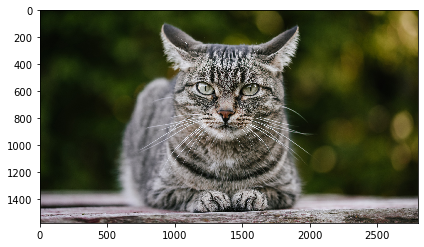

In [240]:
imshow(cat_image)

In [241]:
cat_image.shape

(1575, 2800, 3)

In [242]:
cat_image = resize(cat_image, IMAGE_SHAPE, preserve_range = True)

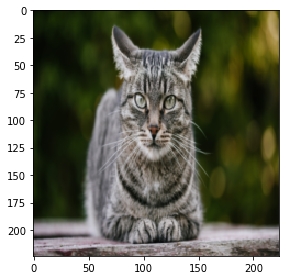

In [243]:
imshow(cat_image.astype(np.uint8))

In [244]:
cat_image = vgg16.preprocess_input(cat_image)

In [245]:
cat_image.shape

(224, 224, 3)

In [246]:
cat_image = tf.expand_dims(cat_image, axis = 0)

In [125]:
predictions = vgg16_model.predict(cat_image)

In [128]:
vgg16.decode_predictions(predictions, top = 20)

[[('n02123159', 'tiger_cat', 0.71375626),
  ('n02123045', 'tabby', 0.20304373),
  ('n02124075', 'Egyptian_cat', 0.071332306),
  ('n02127052', 'lynx', 0.0057632476),
  ('n02129604', 'tiger', 0.0011604519),
  ('n03223299', 'doormat', 0.0003012325),
  ('n04589890', 'window_screen', 0.00020517291),
  ('n04040759', 'radiator', 0.00020204786),
  ('n04355338', 'sundial', 0.00019118891),
  ('n02128757', 'snow_leopard', 0.00018406073),
  ('n03903868', 'pedestal', 0.00017468052),
  ('n03950228', 'pitcher', 0.000110933564),
  ('n02123394', 'Persian_cat', 0.000105686304),
  ('n04435653', 'tile_roof', 0.000100653255),
  ('n04409515', 'tennis_ball', 9.893621e-05),
  ('n04522168', 'vase', 8.80904e-05),
  ('n02909870', 'bucket', 7.9545636e-05),
  ('n03388043', 'fountain', 6.85102e-05),
  ('n02125311', 'cougar', 6.826979e-05),
  ('n03498962', 'hatchet', 6.2753126e-05)]]

In [130]:
resnet_model = resnet_v2.ResNet101V2()

In [131]:
resnet_model.summary()

Model: "resnet101v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
________________________________________________________________________________________

In [163]:
cat_image_resnet = imread("https://static.nationalgeographic.co.uk/files/styles/image_3200/public/01-cat-names-nationalgeographic_1525054.jpg?w=1900&h=1267")

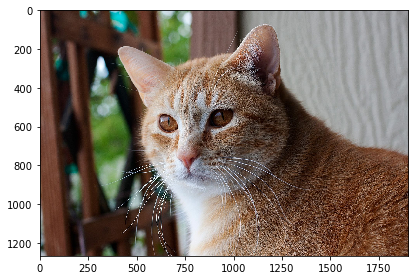

In [168]:
imshow(cat_image_resnet)

In [169]:
cat_image_resnet = resize(cat_image_resnet, IMAGE_SHAPE, preserve_range = True)

In [170]:
cat_image_resnet = resnet_v2.preprocess_input(cat_image_resnet)

In [171]:
cat_image_resnet = tf.expand_dims(cat_image_resnet, axis = 0)

In [172]:
predictions = resnet_model.predict(cat_image_resnet)

In [173]:
resnet_v2.decode_predictions(predictions, top = 20)

[[('n02123159', 'tiger_cat', 0.47684947),
  ('n02123045', 'tabby', 0.35677472),
  ('n02124075', 'Egyptian_cat', 0.1662478),
  ('n02127052', 'lynx', 2.4800936e-05),
  ('n02971356', 'carton', 1.0015918e-05),
  ('n03958227', 'plastic_bag', 8.841275e-06),
  ('n04265275', 'space_heater', 8.413778e-06),
  ('n04040759', 'radiator', 5.1748457e-06),
  ('n02129604', 'tiger', 3.0176777e-06),
  ('n04367480', 'swab', 2.9806015e-06),
  ('n02110806', 'basenji', 2.5950974e-06),
  ('n04589890', 'window_screen', 2.4735166e-06),
  ('n02909870', 'bucket', 1.9622719e-06),
  ('n03482405', 'hamper', 1.9039079e-06),
  ('n03085013', 'computer_keyboard', 1.8531542e-06),
  ('n04033995', 'quilt', 1.4631806e-06),
  ('n03337140', 'file', 1.4369533e-06),
  ('n02870880', 'bookcase', 1.3853181e-06),
  ('n02123597', 'Siamese_cat', 1.0668067e-06),
  ('n03642806', 'laptop', 1.0011538e-06)]]

In [175]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [179]:
vgg16_model.layers[0].output

<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>

In [185]:
[(index, layer.name) for (index, layer) in enumerate(vgg16_model.layers)]

[(0, 'input_1'),
 (1, 'block1_conv1'),
 (2, 'block1_conv2'),
 (3, 'block1_pool'),
 (4, 'block2_conv1'),
 (5, 'block2_conv2'),
 (6, 'block2_pool'),
 (7, 'block3_conv1'),
 (8, 'block3_conv2'),
 (9, 'block3_conv3'),
 (10, 'block3_pool'),
 (11, 'block4_conv1'),
 (12, 'block4_conv2'),
 (13, 'block4_conv3'),
 (14, 'block4_pool'),
 (15, 'block5_conv1'),
 (16, 'block5_conv2'),
 (17, 'block5_conv3'),
 (18, 'block5_pool'),
 (19, 'flatten'),
 (20, 'fc1'),
 (21, 'fc2'),
 (22, 'predictions')]

In [186]:
vgg16_model.layers[0]

In [187]:
vgg16_model.layers[14]

In [190]:
transfer_learning_model = Model(inputs = vgg16_model.layers[0].input, outputs = vgg16_model.layers[14].output)

In [191]:
transfer_learning_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [192]:
for layer in transfer_learning_model.layers:
    layer.trainable = False

In [193]:
transfer_learning_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [195]:
custom_model = Sequential([
    transfer_learning_model,
    Flatten(),
    Dense(150, activation = "relu"),
    Dense(200, activation = "relu"),
    Dense(50, activation = "relu"),
    Dense(2, activation = "sigmoid"),
])

In [196]:
custom_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 14, 14, 512)       7635264   
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 150)               15052950  
_________________________________________________________________
dense_6 (Dense)              (None, 200)               30200     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 102       
Total params: 22,728,566
Trainable params: 15,093,302
Non-trainable params: 7,635,264
__________________________________

In [205]:
vgg16_model.layers

In [209]:
vgg16_model.layers[9].name

'block3_conv3'

In [210]:
layer_to_examine = vgg16_model.layers[9]

In [215]:
len(layer_to_examine.bias.numpy())

256

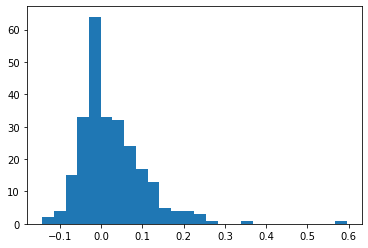

In [219]:
plt.hist(layer_to_examine.bias.numpy(), bins = "fd")
plt.show()

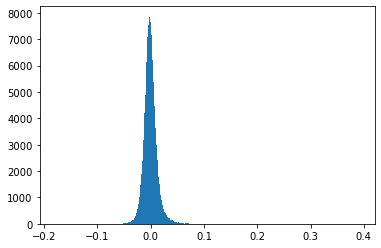

In [222]:
plt.hist(layer_to_examine.kernel.numpy().ravel(), bins = "fd")
plt.show()

In [227]:
kernels = vgg16_model.layers[1].kernel.numpy()[:, :, :, 0]

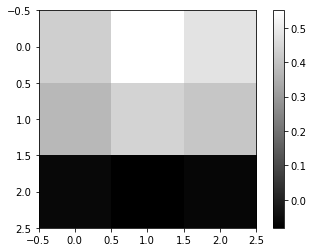

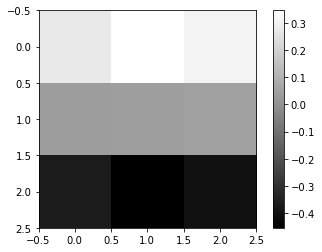

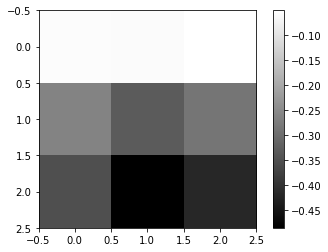

In [234]:
for i in range(kernels.shape[-1]):
    plt.imshow(kernels[i], cmap = "gray")
    plt.colorbar()
    plt.show()

In [235]:
model_to_examine = Model(inputs = vgg16_model.input, outputs = layer_to_examine.output)

In [236]:
model_to_examine.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [252]:
layer_outputs = model_to_examine.predict(cat_image)[0]

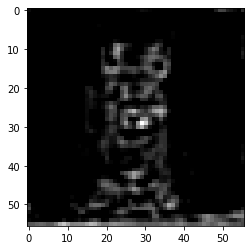

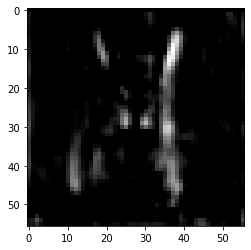

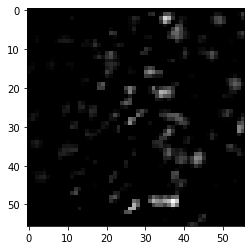

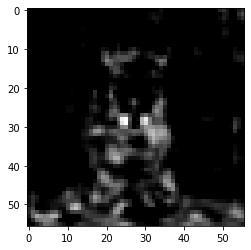

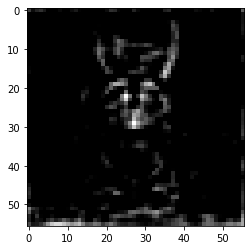

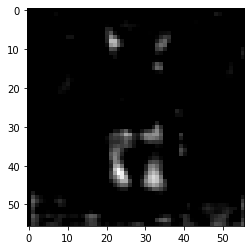

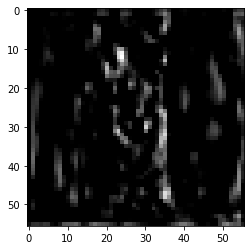

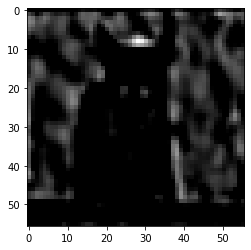

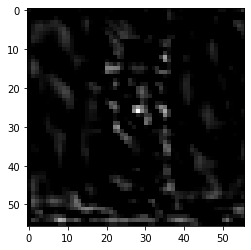

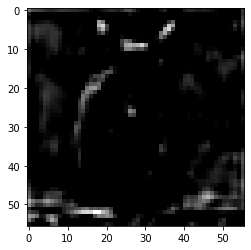

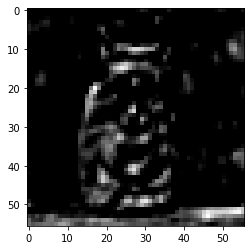

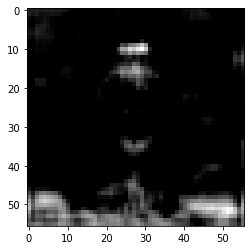

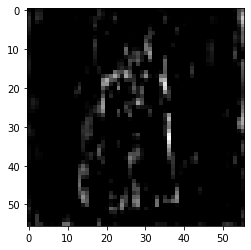

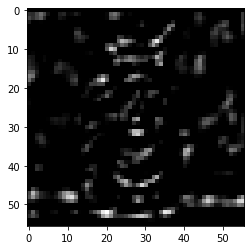

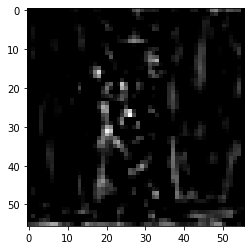

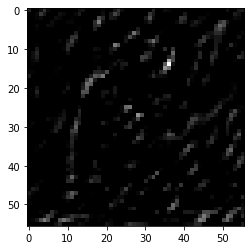

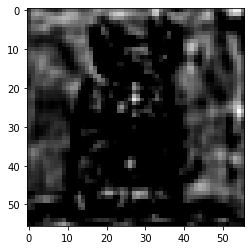

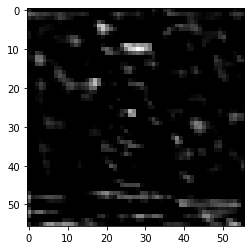

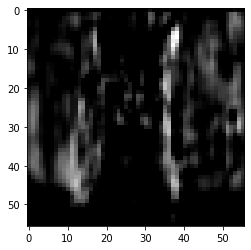

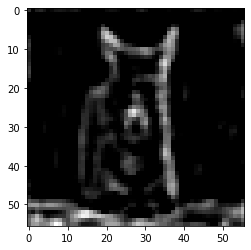

In [261]:
# for i in range(layer_outputs.shape[-1]):
for i in range(20):
    plt.imshow(layer_outputs[:, :, i], cmap = "gray")
    plt.show()

In [266]:
layer_outputs.mean(axis = (0, 1))

array([173.7479  , 170.5114  , 132.66925 , 158.97832 ,  98.0504  ,
        67.06869 , 136.61916 , 395.86484 , 155.19942 ,  72.34356 ,
       191.90996 , 204.818   ,  80.19255 , 155.70854 , 133.59285 ,
        93.00703 , 346.44412 , 124.711525, 342.85028 , 246.10301 ,
        45.706627,  37.676804,  84.442894,  79.68165 , 137.11378 ,
       123.3959  ,  77.34817 , 202.68034 , 164.54066 , 190.649   ,
       191.00104 ,  44.181965,  44.678745, 108.1315  , 176.89052 ,
       105.910034,  89.28007 ,  49.2209  , 130.77852 ,  91.785515,
        70.892075, 168.84628 ,  93.00323 ,  87.40992 ,  47.42817 ,
       175.77266 , 102.01895 ,  25.590725, 119.25008 , 141.62624 ,
       203.82977 ,  85.62871 , 141.23059 , 149.10054 , 282.43283 ,
       115.163475, 105.347595, 150.34496 , 115.92667 , 109.865585,
       350.73343 , 263.0087  , 177.10541 ,  84.9586  , 197.99556 ,
       186.95357 , 171.70384 , 217.75241 , 334.05988 ,  40.989594,
       225.30333 , 124.23187 , 103.10837 , 102.5402  , 119.097

In [267]:
vgg16_model